In [22]:
! pip install plotly==5.3.1
! pip install numpy
! pip install pandas
! pip install pathlib
! pip install wget
! pip install scikit-learn

In [55]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from pathlib import Path
import wget
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
url = 'https://raw.githubusercontent.com/lavaman131/Linear-Regression-Tutorial/main/real_estate_costs.csv'
filename = wget.download(url)

100% [..............................................................................] 21968 / 21968

In [56]:
# load dataset
realEstate_prices = pd.read_csv(Path('real_estate_costs.csv'))

x = 'X2 house age' # explanatory variable
y = 'Y house price of unit area' # response variable

realEstate_prices = realEstate_prices[[x, y]]

realEstate_prices.head()

,X2 house age,Y house price of unit area
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1


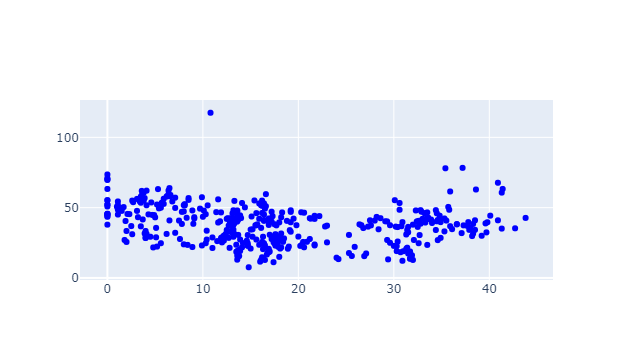

In [57]:
# create plot figure
fig = go.Figure()

# plot scatterplot of data
fig.add_trace(go.Scatter(x=realEstate_prices[x], y=realEstate_prices[y], mode='markers', marker=dict(color='blue'), name='data'))

In [58]:
r = np.corrcoef([realEstate_prices[x]], realEstate_prices[y])[0,1]
r_squared = r**2

In [59]:
print(f'r: {r}, r^2: {r_squared}')

r: -0.21056704627721692, r^2: 0.04433848097791161


In [60]:
# prepare X and y
X = np.array(realEstate_prices['X2 house age']).reshape(-1,1)
y = np.array(realEstate_prices['Y house price of unit area']).reshape(-1,1)

# split data into 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
# create linear regression model
reg = LinearRegression()

# fit model using linear algebra
reg.fit(X_train, y_train)

# get accuracy of model (r^2)
reg.score(X_test, y_test)

0.04983657274877329

In [62]:
y_pred = reg.predict(X_test)

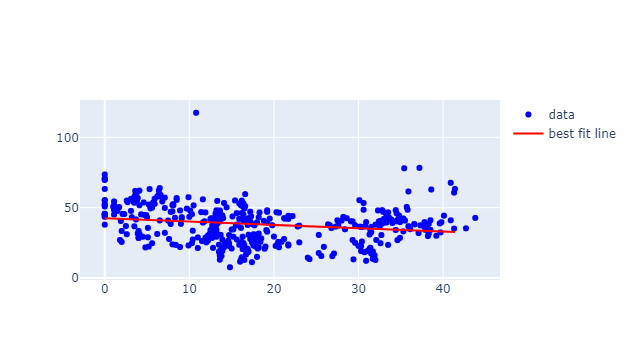

In [63]:
fig.add_trace(go.Scatter(x=X_test.reshape(-1), y=y_pred.reshape(-1), line_shape='linear', marker=dict(color='red'), name='best fit line'))